<a href="https://colab.research.google.com/github/316104127/classifications_diabetes/blob/main/classifications_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importações / Atualizações

In [1]:
!pip install plotly --upgrade

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt


pd.set_option('float_format','{:.2f}'.format)

In [4]:
path1 ='/content/drive/MyDrive/2022/Kaggle/classifications/diabetes.csv'

In [5]:
diabetes = pd.read_csv(path1)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


## Observações

In [6]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
print("Idade mínima")
diabetes['Age'].min()

Idade mínima


21

In [10]:
print("Idade máxima")
diabetes['Age'].max()

Idade máxima


81

In [11]:
df_age_qtd = diabetes['Age'].value_counts().reset_index()
df_age_qtd.rename(columns={'Age':'QTD','index':'Age'}, inplace=True)

As idades vão de 21 a 81, a maioria estão abaixo dos 50 anos.

In [12]:
fig = px.bar(df_age_qtd, x="Age", y="QTD", title='Idades mais frequentes', text='Age', color='Age')
fig

In [13]:
print("Idade mediana")

df_age_qtd.median()

Idade mediana


Age   46.50
QTD    8.00
dtype: float64

In [14]:
#Separação por idade mediana 
diabetes_age_max_46 = diabetes.loc[diabetes['Age'] >= 46 ]
diabetes_age_max_46

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1
12,10,139,80,0,0,27.10,1.44,57,0
13,1,189,60,23,846,30.10,0.40,59,1
...,...,...,...,...,...,...,...,...,...
749,6,162,62,0,0,24.30,0.18,50,1
757,0,123,72,0,0,36.30,0.26,52,1
759,6,190,92,0,0,35.50,0.28,66,1
763,10,101,76,48,180,32.90,0.17,63,0


In [15]:
diabetes_age_min_46 = diabetes.loc[diabetes['Age'] < 46 ]
diabetes_age_min_46

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.00,0.40,43,1
762,9,89,62,0,0,22.50,0.14,33,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0


In [16]:
diabetes_mediana_maior = diabetes_age_min_46['Outcome'].value_counts().reset_index()
diabetes_mediana_maior.rename(columns={'index':'Outcome','Outcome':'QTD'}, inplace=True)
diabetes_mediana_maior

,Outcome,QTD
0,0,440
1,1,210


In [17]:
diabetes_mediana_menor = diabetes_age_max_46['Outcome'].value_counts().reset_index()
diabetes_mediana_menor.rename(columns={'index':'Outcome','Outcome':'QTD'}, inplace=True)
diabetes_mediana_menor

,Outcome,QTD
0,0,60
1,1,58


In [18]:
diabetes_mediana = diabetes_mediana_menor
diabetes_mediana = diabetes_mediana.merge(diabetes_mediana_maior, on='Outcome')
diabetes_mediana.rename(columns={'QTD_x':'Outcome_Age_Maior','QTD_y':'Outcome_Age_Menor'}, inplace=True)
diabetes_mediana

,Outcome,Outcome_Age_Maior,Outcome_Age_Menor
0,0,60,440
1,1,58,210


In [19]:
diabetes_mediana_maior = go.Bar(x = diabetes_mediana['Outcome'],
                y = diabetes_mediana['Outcome_Age_Maior'],
               name = 'Age > = 46',
               marker = {'color': 'indianred'}, text='Outcome')

Outcome_Menor = go.Bar(x = diabetes_mediana['Outcome'],
                y = diabetes_mediana['Outcome_Age_Menor'],
             name = 'Age < 46 ',
             marker = {'color': 'lightsalmon'}, text='Outcome', )

data = [diabetes_mediana_maior, Outcome_Menor]

py.iplot(data)

#Consigo perceber quem tem mais resultados, e quem tem mais positivo e negativo de acordo com a quantidade.

In [20]:
diabetes_1 = diabetes.loc[diabetes.Outcome == 1]
diabetes_0 = diabetes.loc[diabetes.Outcome == 0]

In [21]:
df_age_diabetes_1 = diabetes_1['Age'].value_counts().reset_index()
df_age_diabetes_1.rename(columns={'Age':'QTD','index':'Age'}, inplace=True)

df_age_diabetes_0 = diabetes_0['Age'].value_counts().reset_index()
df_age_diabetes_0.rename(columns={'Age':'QTD','index':'Age'}, inplace=True)

In [23]:
fig = px.bar(df_age_diabetes_1, x="Age", y="QTD", text='QTD', color='Age').update_xaxes(categoryorder='total descending')
fig.update_layout(title='Idades mais frequentes com diabetes',title_font_size=25,title_x=0.5,title_font_family='Arial',
                   xaxis_title='Idade',
                   yaxis_title='Quantidade')
fig
#Não há uma especificidade em ser mais velho e mais novo, qualquer um pode ter, não há idade para ter

In [ ]:
fig = px.bar(df_age_diabetes_0, x="Age", y="QTD", text='Age', color='Age').update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Idades mais frequentes sem diabetes',title_font_size=25,title_x=0.5,title_font_family='Arial',
                   xaxis_title='Idade',
                   yaxis_title='Quantidade')
fig
#A maioria das pessoas que não tem são jovens, 

In [ ]:
print('Idade mínima com diabetes')
df_age_diabetes_1['Age'].min()

Idade mínima com diabetes


21

In [ ]:
print('Idade máxima com diabetes')
df_age_diabetes_1['Age'].max()

Idade máxima com diabetes


70

In [ ]:
print('Idade mínima sem diabetes')
df_age_diabetes_0['Age'].min()

Idade mínima sem diabetes


21

In [ ]:
print('Idade máxima sem diabetes')
df_age_diabetes_0['Age'].max()

Idade máxima sem diabetes


81

In [ ]:
print('Idade máxima sem diabetes')
df_age_diabetes_0['Age'].mean()

Idade máxima sem diabetes


46.23529411764706

In [ ]:
print('Idade máxima com diabetes')
df_age_diabetes_1['Age'].mean()

Idade máxima com diabetes


43.24444444444445

## ML

Primeira tentativa com todas as variáveis

In [24]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [25]:
#Verificando valores vazios
diabetes.isna().values.any()

False

In [26]:
diabetes.isnull().values.any()

False

In [27]:
#Função correlação, 'Ideias relacionadas entre si'
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

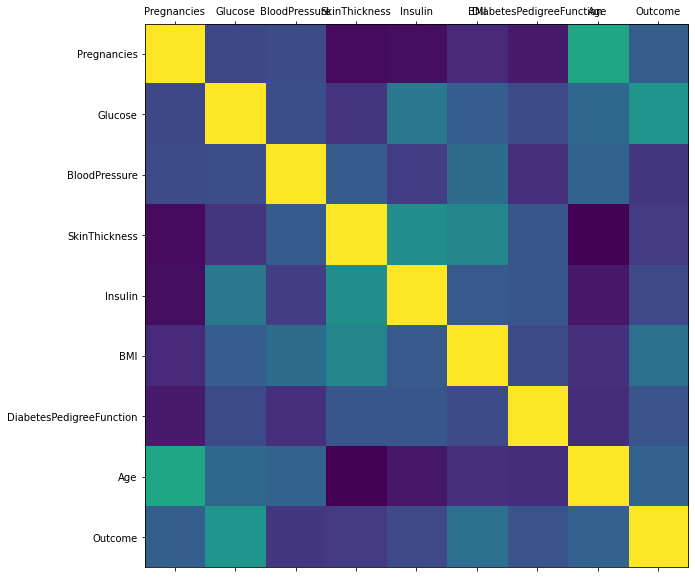

In [28]:
# Criando o gráfico
plot_corr(diabetes)

In [ ]:
# Visualizando a correlação em tabela
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [29]:
#Verificando a quantidade de dados igual a 0
print("Linhas no dataframe {}".format(len(diabetes)))

print("\nLinhas missing Pregnancies: {0}".format(len(diabetes.loc[diabetes['Pregnancies'] == 0])))

print("\nLinhas missing BloodPressure: {0}".format(len(diabetes.loc[diabetes['BloodPressure'] == 0])))

print("\nLinhas missing SkinThickness: {0}".format(len(diabetes.loc[diabetes['SkinThickness'] == 0])))

print("\nLinhas missing Insulin: {0}".format(len(diabetes.loc[diabetes['Insulin'] == 0])))

print("\nLinhas missing BMI: {0}".format(len(diabetes.loc[diabetes['BMI'] == 0])))

print("\nLinhas missing DiabetesPedigreeFunction: {0}".format(len(diabetes.loc[diabetes['DiabetesPedigreeFunction'] == 0])))

print("\nLinhas missing Glucose: {0}".format(len(diabetes.loc[diabetes['Glucose'] == 0])))


Linhas no dataframe 768

Linhas missing Pregnancies: 111

Linhas missing BloodPressure: 35

Linhas missing SkinThickness: 227

Linhas missing Insulin: 374

Linhas missing BMI: 11

Linhas missing DiabetesPedigreeFunction: 0

Linhas missing Glucose: 5


In [31]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Variável a ser prevista
atrib_prev = ['Outcome']

# Criando objetos
X = diabetes[atributos].values
Y = diabetes[atrib_prev].values

# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 42)


# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(diabetes.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(diabetes.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [33]:
print("Original True : {0} ({1:0.2f}%)".format(len(diabetes.loc[diabetes['Outcome'] == 1]), 
                                               (len(diabetes.loc[diabetes['Outcome'] ==1])/len(diabetes.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(diabetes.loc[diabetes['Outcome'] == 0]), 
                                               (len(diabetes.loc[diabetes['Outcome'] == 0])/len(diabetes.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


In [34]:
#Verificando valores vazios

diabetes.isna().values.any()

False

In [35]:
diabetes.isnull().values.any()

False

In [36]:
# Terceira versão do modelo usando Regressão Logística
modelo = LogisticRegression(C = 0.7, random_state = 30, max_iter = 1000)
modelo.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo.predict(X_teste)


# Verificando os dados de treino
rf_predict_train = modelo.predict(X_treino)
print("Exatidão Treino (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão Treino (Accuracy): 0.7840


In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo.predict(X_teste)
print("Exatidão Teste (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão Teste (Accuracy): 0.7359



In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7359

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        80
           0       0.80      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [37]:
# Salvando o modelo de teste.
filename = 'modelo_treinado.sav'
pickle.dump(modelo, open(filename, 'wb'))

# Carregando o modelo e fazendo previsão com novos conjuntos de dados 

loaded_model = pickle.load(open(filename, 'rb'))


i = 0


print(f"{X_teste[i]}")


for valor in X_teste:
    resultado = loaded_model.predict(X_teste[i].reshape(1, -1))
    
    print(f"Resultado: {resultado}")
    i += 1

[  6.    98.    58.    33.   190.    34.     0.43  43.  ]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [

In [38]:
tam = i
i = 0
data_array1 = []

while tam > 0:
    resultado = loaded_model.predict(X_teste[i].reshape(1, -1))
    #v1 = data_array.iloc[i].values
    data_array1.append(resultado)
    tam -=1
    i +=1

data_array1 = np.array(data_array1)
data_array1

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

Segunda tentativa sem informações de gravidez e dobra do tríceps

In [39]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['Glucose','Insulin','DiabetesPedigreeFunction','BMI','BloodPressure','Age']

# Variável a ser prevista
atrib_prev = ['Outcome']

# Criando objetos
X = diabetes[atributos].values
Y = diabetes[atrib_prev].values

# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 42)


# Terceira versão do modelo usando Regressão Logística
modelo = LogisticRegression(C = 0.7, random_state = 30, max_iter = 1000)
modelo.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo.predict(X_teste)


# Verificando os dados de treino
rf_predict_train = modelo.predict(X_treino)
print("Exatidão Treino (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão Treino (Accuracy): 0.7858


In [40]:
# Verificando nos dados de teste
rf_predict_test = modelo.predict(X_teste)
print("Exatidão Teste (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão Teste (Accuracy): 0.7403



In [41]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7403

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.59      0.61        80
           0       0.79      0.82      0.81       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [42]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [43]:
# Verificando os dados de treino
rf_predict_train = modelo.predict(X_treino)
print("Exatidão Treino (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão Treino (Accuracy): 0.7858


In [44]:
# Verificando nos dados de teste
rf_predict_test = modelo.predict(X_teste)
print("Exatidão Teste (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão Teste (Accuracy): 0.7446



In [45]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7403

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.59      0.61        80
           0       0.79      0.82      0.81       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [46]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado.sav'
pickle.dump(modelo, open(filename, 'wb'))

In [47]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))

i = 0

for valor in X_teste:
    resultado = loaded_model.predict(X_teste[i].reshape(1, -1))
    #print(f"Valores para previsão: Quantidade: {valor[0]} | Valor total da venda: {valor[1]} | Restou da Shoppe: {valor[2]} | Restou Neutro {valor[3]}")
    print(f"Resultado: {resultado}")
    i += 1

Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado: [1]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [0]
Resultado: [1]
Resultado:

In [48]:
tam2 = i
i2 = 0
data_array2 = []

while tam2 > 0:
    resultado2 = loaded_model.predict(X_teste[i2].reshape(1, -1))
    #v1 = data_array.iloc[i].values
    data_array2.append(resultado2)
    tam2 -=1
    i2 +=1

data_array2 = np.array(data_array2)
data_array2

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [49]:
cont = 231
cont_i = 0
array_result = []

while cont > 0:
    print(data_array1[cont_i] == data_array2[cont_i])
    array_result.append(data_array1[cont_i] == data_array2[cont_i])
    cont_i += 1
    cont -= 1

[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]


In [50]:
array_result_0_1 = pd.DataFrame(array_result).reset_index()
array_result_0_1.rename(columns={0:'Resultado'}, inplace=True)
array_result_0_1

,index,Resultado
0,0,True
1,1,True
2,2,True
3,3,True
4,4,False
...,...,...
226,226,True
227,227,True
228,228,True
229,229,True


In [51]:
array_result_0_1_num = array_result_0_1['Resultado'].map({True:1,False:0})
array_result_0_1_num

0      1
1      1
2      1
3      1
4      0
      ..
226    1
227    1
228    1
229    1
230    1
Name: Resultado, Length: 231, dtype: int64

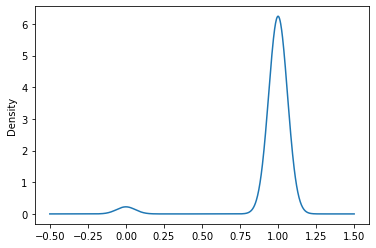

In [52]:
array_result_0_1_num.plot(kind="density")  
plt.show()

In [53]:
len(array_result_0_1_num)

231

In [54]:
array_result_0_1_num.value_counts()

1    223
0      8
Name: Resultado, dtype: int64

In [55]:
round((223/len(array_result_0_1_num))*100,2)

96.54

In [56]:
round((8/len(array_result_0_1_num))*100,2)

3.46